In [1]:
%cd /Users/monica_air/Documents/GitHub/Sign_recognition/py

from basic_preprocessing import *
from machine_learning import *
%cd /Users/monica_air/Documents/Sign recognition/decriptor

/Users/monica_air/Documents/GitHub/Sign_recognition/py
/Users/monica_air/Documents/Sign recognition/decriptor


(4032, 3024, 3)


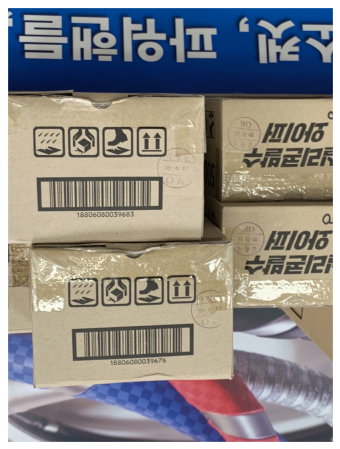

In [2]:
img_ORG =INPUT_IMG('/Users/monica_air/Documents/Sign recognition/Datasets/Didnt use/KakaoTalk_20211006_133925942_26.jpg')
print(img_ORG.shape)
show(img_ORG)

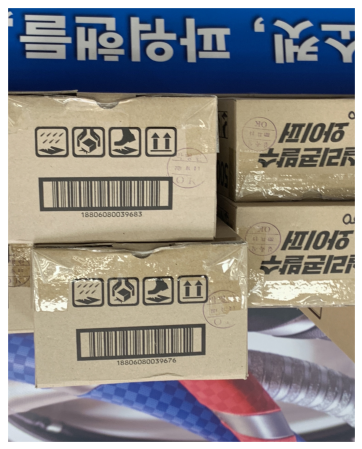

In [3]:
resize = cv2.resize(img_ORG,(800,1000))
show(resize)

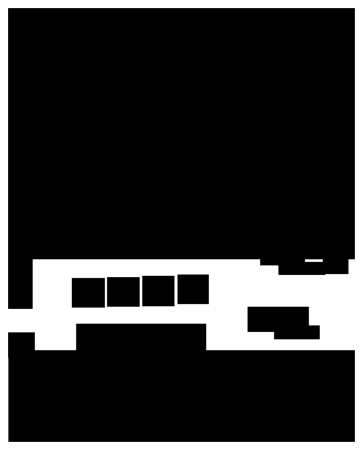

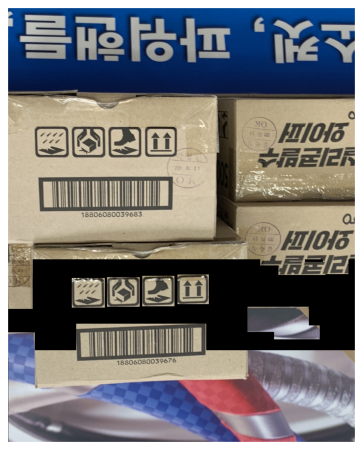

In [26]:
# img =  cv2.imread('demo-hand-written.png')
img = resize.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thresh_inv = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# Blur the image
blur = cv2.GaussianBlur(thresh_inv,(1,1),0)

thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# find contours
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

mask = np.ones(img.shape[:2], dtype="uint8") * 255
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    if w*h>1000:
        cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)

res_final = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

show(mask)
show(res_final)

https://stackoverflow.com/questions/57196047/how-to-detect-all-the-rectangular-boxes-in-the-given-image